In [32]:
import pathlib as pl
import IPython.display as ipd
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt


# sound exmaple
for the dissertation defense presentation.
uses the sound index parameter for the example site "ARM021b" for the CPN experiment
the example instances are the ones used on figure 1.

In [51]:
examples = [
    ('ARM021b-36-8', [1, 3], 4),
    ('ARM021b-36-8', [0, 1], 3),]

parame_idx = np.asarray([15, 2, 4, 7, 7])
sound_folder = pl.Path('/auto/users/mateo/code/baphy/Config/lbhb/SoundObjects/@NaturalPairs/NatPairSounds')
sound_files = np.asarray(list(sound_folder.iterdir()))

sel_files = sound_files[parame_idx-1]
print(sel_files)

[PosixPath('/auto/users/mateo/code/baphy/Config/lbhb/SoundObjects/@NaturalPairs/NatPairSounds/15_cat668_rec1_ferret_fights_Athena-Violet001_excerpt2_15.wav')
 PosixPath('/auto/users/mateo/code/baphy/Config/lbhb/SoundObjects/@NaturalPairs/NatPairSounds/02_cat90_rec1_colouring_freesound_123jorre456_excerpt1_2.wav')
 PosixPath('/auto/users/mateo/code/baphy/Config/lbhb/SoundObjects/@NaturalPairs/NatPairSounds/04_cat159_rec1_flute_bourree_excerpt1_4.wav')
 PosixPath('/auto/users/mateo/code/baphy/Config/lbhb/SoundObjects/@NaturalPairs/NatPairSounds/07_cat220_rec1_latin-pop_enrique-iglesias_i-will-survive_excerpt1_7.wav')
 PosixPath('/auto/users/mateo/code/baphy/Config/lbhb/SoundObjects/@NaturalPairs/NatPairSounds/07_cat220_rec1_latin-pop_enrique-iglesias_i-will-survive_excerpt1_7.wav')]


44100
44100
44100
44100
44100


/tmp/ipykernel_9336/82214761.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


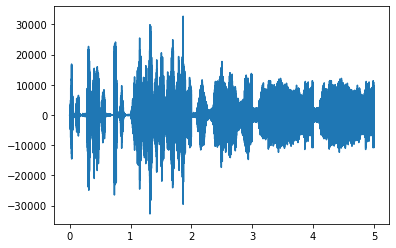

In [63]:
waves = list()

for wave in sel_files:
    samplerate, data = wavfile.read(wave)
    print(samplerate)
    # just get 1 second
    waves.append(data[:samplerate])

waves = np.concatenate(waves)

# amplitude normalization
amplitude = np.iinfo(np.int16).max
waves = waves / np.max(np.abs(waves)) * amplitude


fig, ax = plt.subplots()
ax.plot(np.linspace(0,len(sel_files),len(waves)), waves)

fig.show()


ipd.Audio(waves, rate=samplerate)

In [64]:
outfile = pl.Path('/auto/users/mateo/code/context_probe_analysis/reports/figures/example_sequence.wav')
wavfile.write(outfile, samplerate, waves.astype(np.int16))